In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from scipy.stats import ttest_ind

# plotting modules
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

In [9]:
add_df = pd.read_csv("/data6/deepro/ukb_bmi/3_characterization/data/additive_test/lifestyle/train_cohort_pred.csv", dtype={"sample_names": str, "bmi": float, "bmi_pred": float})
combo_info_df = pd.read_csv("/data6/deepro/ukb_bmi/3_characterization/data/combos_in_cohort/lifestyle/train_cohort.csv")

In [10]:
def get_exp_obs(samples, add_df):
    add_df = add_df.loc[add_df.sample_names.isin(samples)]
    return pd.Series({"bmi_pred": add_df.bmi_pred.mean(), "bmi": add_df.bmi.mean()})


combo_add_info = combo_info_df.combo_samples.str.split("|").apply(get_exp_obs, args=(add_df, ))

In [11]:
combo_info_df = pd.concat((combo_info_df, combo_add_info), axis=1)

/tmp/ipykernel_79155/3519742240.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
/tmp/ipykernel_79155/3519742240.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)


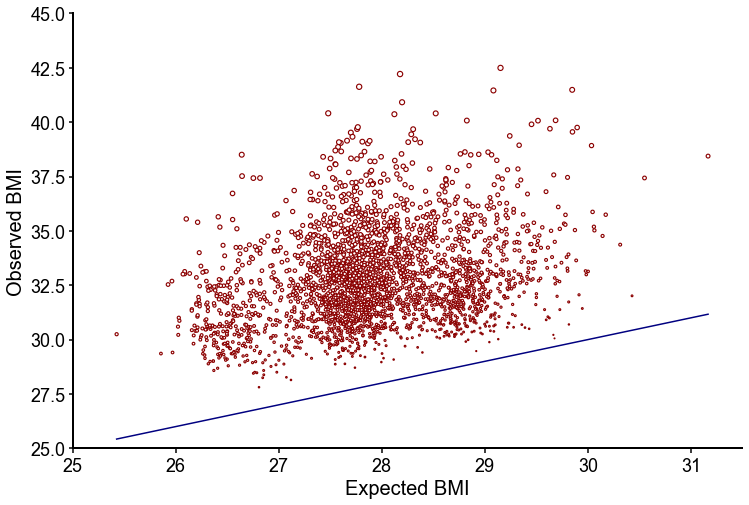

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))

plot_df = combo_info_df

plot_df["sizes"] = (plot_df.bmi - plot_df.bmi_pred).abs()

sns_ax = sns.lineplot(data=plot_df, x="bmi_pred", y="bmi_pred", color="navy", ax=ax)


sns_ax2 = sns.scatterplot(data=plot_df, x="bmi_pred", y="bmi", color="white", ax=ax, s=(plot_df.sizes)*2, ec="darkred", linewidth=1.15)

ax.set_xlim((25, 31.5))
ax.set_ylim((25, 45))

ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
ax.set_xlabel("Expected BMI", fontsize=20)
ax.set_ylabel("Observed BMI", fontsize=20)
# Remove Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);



In [18]:
ttest_ind(add_df.bmi, add_df.bmi_pred, alternative="greater", equal_var=False)

TtestResult(statistic=82.53882403485427, pvalue=0.0, df=22220.823569763947)

In [19]:
combo_info_df

,uniq_items,combo_samples,combo_samples_bmi,combo_samples_bmi_prs,mean_bmi,mean_bmi_prs,bmi_pred,bmi,sizes
0,Input_CACNA1B|Input_TTN|Input_met,1088889|1116072|1369432|1379566|1408095|154688...,36.3623|26.9149|31.7916|32.5437|24.6505|31.217...,0.8976|0.6021|-0.4233|0.3642|-0.6777|0.3431|0....,29.998572,-0.117377,27.578572,29.998571,2.419999
1,Input_CACNA1B|Input_CNTN5|Input_met,1075854|2315912|3434861|3498977|4242728|457937...,34.1808|26.6211|34.7595|33.309|33.8349|29.8263...,-0.2546|-0.7696|0.2414|-0.1305|-1.8287|-0.8731...,31.507878,-0.335611,27.584618,31.507872,3.923255
2,Input_SMARCA2|Input_met|Input_sedentary,1164408|1167955|1186399|1225469|1234008|125673...,39.2593|27.564|20.4165|37.7583|31.8966|34.828|...,0.7621|0.4738|-0.9012|1.6235|-0.755|0.816|0.12...,32.490267,0.279221,28.393233,32.490267,4.097033
3,Input_SMARCA2|Input_sedentary|Input_smoke,1209411|1225469|1256761|1816396|2369469|250054...,28.5949|37.7583|35.3231|20.7644|39.6931|40.123...,-1.6688|1.6235|0.0689|-1.707|0.7391|-0.5826|0....,31.382984,0.182163,27.683075,31.382984,3.699910
4,Input_SMARCA2|Input_meat|Input_sedentary,1220347|1256761|1591947|1761701|1888526|259034...,25.8984|35.3231|31.1419|39.214|38.0196|34.0138...,-0.0882|0.0689|1.8025|0.7353|2.1499|0.0273|-0....,34.009230,0.417610,28.244289,34.009230,5.764941
...,...,...,...,...,...,...,...,...,...
2758,Input_SEC23B|Input_coffee|Input_met|Input_sede...,1055631|1991821|2430612|3862835|4327951,34.1497|32.8816|41.6123|39.7266|30.173,0.241|0.9766|-0.8704|0.3497|-0.4953,35.708640,0.040320,28.957653,35.708640,6.750987
2759,Input_SLC7A9|Input_alcohol|Input_met|Input_sed...,1161221|1466771|2100156|2297586|2392936|251291...,34.6028|28.1678|30.7012|26.3245|36.3303|31.334...,-0.8576|-1.4819|-1.099|-0.8991|0.3338|0.4405|1...,31.143488,-0.015718,28.030150,31.143488,3.113338
2760,Input_KRT32|Input_alcohol|Input_met|Input_sede...,2418307|2980086|4651418|4939727|5234339|5695718,38.3883|31.7688|31.2072|33.3388|30.6706|29.0123,1.6|0.758|-2.7864|-0.686|-2.1963|-2.8927,32.397667,-1.033900,28.567668,32.397667,3.829999
2761,Input_BRIP1|Input_alcohol|Input_met|Input_sede...,1447769|1810612|2616847|3012215|4447269|4654107,37.6264|37.5371|31.4789|32.4032|30.6148|27.8539,-0.8202|-0.272|-1.8477|-1.4101|-1.0566|-1.7167,32.919050,-1.187217,28.893405,32.919050,4.025645


In [20]:
combo_info_df = pd.concat((combo_info_df, combo_info_df.uniq_items.str.split("|", expand=True).rename(columns={0: "Gene1", 1: "Gene2", 2: "Gene3", 3: "Gene4"})), axis=1)

In [21]:
combo_info_df

,uniq_items,combo_samples,combo_samples_bmi,combo_samples_bmi_prs,mean_bmi,mean_bmi_prs,bmi_pred,bmi,sizes,Gene1,Gene2,Gene3,Gene4
0,Input_CACNA1B|Input_TTN|Input_met,1088889|1116072|1369432|1379566|1408095|154688...,36.3623|26.9149|31.7916|32.5437|24.6505|31.217...,0.8976|0.6021|-0.4233|0.3642|-0.6777|0.3431|0....,29.998572,-0.117377,27.578572,29.998571,2.419999,Input_CACNA1B,Input_TTN,Input_met,None
1,Input_CACNA1B|Input_CNTN5|Input_met,1075854|2315912|3434861|3498977|4242728|457937...,34.1808|26.6211|34.7595|33.309|33.8349|29.8263...,-0.2546|-0.7696|0.2414|-0.1305|-1.8287|-0.8731...,31.507878,-0.335611,27.584618,31.507872,3.923255,Input_CACNA1B,Input_CNTN5,Input_met,None
2,Input_SMARCA2|Input_met|Input_sedentary,1164408|1167955|1186399|1225469|1234008|125673...,39.2593|27.564|20.4165|37.7583|31.8966|34.828|...,0.7621|0.4738|-0.9012|1.6235|-0.755|0.816|0.12...,32.490267,0.279221,28.393233,32.490267,4.097033,Input_SMARCA2,Input_met,Input_sedentary,None
3,Input_SMARCA2|Input_sedentary|Input_smoke,1209411|1225469|1256761|1816396|2369469|250054...,28.5949|37.7583|35.3231|20.7644|39.6931|40.123...,-1.6688|1.6235|0.0689|-1.707|0.7391|-0.5826|0....,31.382984,0.182163,27.683075,31.382984,3.699910,Input_SMARCA2,Input_sedentary,Input_smoke,None
4,Input_SMARCA2|Input_meat|Input_sedentary,1220347|1256761|1591947|1761701|1888526|259034...,25.8984|35.3231|31.1419|39.214|38.0196|34.0138...,-0.0882|0.0689|1.8025|0.7353|2.1499|0.0273|-0....,34.009230,0.417610,28.244289,34.009230,5.764941,Input_SMARCA2,Input_meat,Input_sedentary,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,Input_SEC23B|Input_coffee|Input_met|Input_sede...,1055631|1991821|2430612|3862835|4327951,34.1497|32.8816|41.6123|39.7266|30.173,0.241|0.9766|-0.8704|0.3497|-0.4953,35.708640,0.040320,28.957653,35.708640,6.750987,Input_SEC23B,Input_coffee,Input_met,Input_sedentary
2759,Input_SLC7A9|Input_alcohol|Input_met|Input_sed...,1161221|1466771|2100156|2297586|2392936|251291...,34.6028|28.1678|30.7012|26.3245|36.3303|31.334...,-0.8576|-1.4819|-1.099|-0.8991|0.3338|0.4405|1...,31.143488,-0.015718,28.030150,31.143488,3.113338,Input_SLC7A9,Input_alcohol,Input_met,Input_sedentary
2760,Input_KRT32|Input_alcohol|Input_met|Input_sede...,2418307|2980086|4651418|4939727|5234339|5695718,38.3883|31.7688|31.2072|33.3388|30.6706|29.0123,1.6|0.758|-2.7864|-0.686|-2.1963|-2.8927,32.397667,-1.033900,28.567668,32.397667,3.829999,Input_KRT32,Input_alcohol,Input_met,Input_sedentary
2761,Input_BRIP1|Input_alcohol|Input_met|Input_sede...,1447769|1810612|2616847|3012215|4447269|4654107,37.6264|37.5371|31.4789|32.4032|30.6148|27.8539,-0.8202|-0.272|-1.8477|-1.4101|-1.0566|-1.7167,32.919050,-1.187217,28.893405,32.919050,4.025645,Input_BRIP1,Input_alcohol,Input_met,Input_sedentary


In [24]:
combo_info_df_mini = combo_info_df.sort_values("sizes", ascending=False).head(10)

In [25]:
combo_info_df_mini

,uniq_items,combo_samples,combo_samples_bmi,combo_samples_bmi_prs,mean_bmi,mean_bmi_prs,bmi_pred,bmi,sizes,Gene1,Gene2,Gene3,Gene4
739,Input_CAD|Input_STOML1|Input_met,1351963|3292085|3388991|3635959|3809715,40.7777|59.4499|34.0866|39.2308|37.5144,0.6681|-0.6427|1.4166|0.5442|0.405,42.211880,0.478240,28.176612,42.211880,14.035268,Input_CAD,Input_STOML1,Input_met,None
1535,Input_ME1|Input_MYH2|Input_met,1060844|1187598|1300917|1529984|2180516|3799657,42.2052|41.6652|67.3828|35.727|35.643|27.1349,0.8556|0.5223|1.9562|0.2347|-1.5269|-0.8836,41.626350,0.193050,27.779623,41.626356,13.846733,Input_ME1,Input_MYH2,Input_met,None
1807,Input_AGXT|Input_bread|Input_sleep,1646629|2067813|3616898|4472044|4632644|4836777,53.794|27.2151|57.4047|33.8026|34.0649|48.6876,0.2927|-0.2533|1.3557|-0.4618|-0.476|1.7927,42.494817,0.375000,29.151651,42.494817,13.343165,Input_AGXT,Input_bread,Input_sleep,None
2154,Input_LAMA2|Input_MATN2|Input_met,1494826|1574823|2838310|5373956|5477365|5769190,32.6652|34.0472|61.708|60.5536|31.0804|22.3875,-1.2731|1.3509|-0.3385|0.0036|-0.2138|-2.0916,40.406983,-0.427083,27.479185,40.406983,12.927798,Input_LAMA2,Input_MATN2,Input_met,None
544,Input_MICAL1|Input_MYO3B|Input_met,2840640|2979286|4845011|5635057|5797514,34.009|43.0041|40.7331|38.6352|48.1928,-0.9482|-0.5288|-1.1883|1.1565|0.1305,40.914840,-0.275660,28.196105,40.914850,12.718745,Input_MICAL1,Input_MYO3B,Input_met,None
1334,Input_PHKA1|Input_WFS1|Input_sleep,1052650|2182397|2682570|2940150|4019760,42.5524|45.6945|29.3367|47.8138|41.89,0.4001|0.6631|-1.1737|-1.1173|-0.7048,41.457480,-0.386520,29.082795,41.457480,12.374685,Input_PHKA1,Input_WFS1,Input_sleep,None
2088,Input_KCNJ14|Input_KRT35|Input_met,1521703|1877905|5271039|5431377|5698808,44.586|44.6742|31.4062|36.6437|44.5128,0.7349|0.8631|-0.3036|-0.7937|0.8705,40.364580,0.274240,28.121508,40.364580,12.243072,Input_KCNJ14,Input_KRT35,Input_met,None
1150,Input_JAG1|Input_MYO1G|Input_met,1505291|1538757|3469045|3848878|4958066|5914609,37.6843|37.4985|44.6356|56.7677|30.2628|31.7718,-0.1258|0.188|1.871|1.859|-0.5571|0.0114,39.770117,0.541083,27.766665,39.770117,12.003451,Input_JAG1,Input_MYO1G,Input_met,None
569,Input_ABCC10|Input_INPP5B|Input_sedentary,2425985|2563917|2641245|3772248|4028349,58.9246|32.1124|35.748|33.3108|38.3347,0.3046|0.1792|0.38|-0.5051|1.0034,39.686100,0.272420,27.759628,39.686100,11.926472,Input_ABCC10,Input_INPP5B,Input_sedentary,None
2571,Input_DNAJC5|Input_met|Input_sedentary,1320028|1466424|1707845|2526739|2545634|356780...,36.751|24.6947|32.2779|60.8595|29.4724|57.66|3...,1.4471|-0.4022|0.3457|0.8688|-0.156|0.4034|0.5...,40.403050,0.476938,28.522712,40.403050,11.880338,Input_DNAJC5,Input_met,Input_sedentary,None


In [61]:
all_genes = "|".join(combo_info_df.uniq_items).split("|")

In [154]:
gene_count_dict = Counter(all_genes)

In [64]:
gene_count_dict = Counter(all_genes)

In [131]:
topn = 15

In [132]:
def find_best_factor_for_heatmap(num):
    factors = []
    for i in range(1, int(num**0.5)+1):
        if num%i==0:
            possible_factors = tuple(sorted([i, num//i]))
            if possible_factors[1]/possible_factors[0]<5:
                factors.append(possible_factors)
    return sorted(factors, key=lambda x: abs(2-(x[1]/x[0])))[0]


In [133]:
values_in_arr = topn**2

In [134]:
heatmap_layout = find_best_factor_for_heatmap(values_in_arr)

In [135]:
heatmap_layout

(9, 25)

In [136]:
combo_info_df_mini = combo_info_df.sort_values("sizes", ascending=False).head(topn)

In [138]:
gene_count_dict = Counter("|".join(combo_info_df_mini.uniq_items).split("|"))

In [146]:
xset = set()
yset = set()
zset = set()


myarr = np.zeros(heatmap_layout)
sorted_genes = [g[0] for g in gene_count_dict.most_common()]

for df_values in combo_info_df_mini.itertuples():
    genes = df_values.uniq_items.split("|")
    print(genes)
    break

['Input_CYP4X1', 'Input_MADD']


In [155]:
gene_count_dict["Input_MADD"]

1

[('Input_CYP4X1', 1),
 ('Input_MADD', 1),
 ('Input_CAPN3', 1),
 ('Input_COL5A1', 1),
 ('Input_NAV2', 1),
 ('Input_DHX40', 1),
 ('Input_KIF13A', 1),
 ('Input_AGL', 1),
 ('Input_ZNG1A', 1),
 ('Input_LRP1B', 1),
 ('Input_MYO15A', 1),
 ('Input_TENM2', 1),
 ('Input_SLTM', 1),
 ('Input_UGT2A1', 1),
 ('Input_UGT2A2', 1),
 ('Input_CDHR5', 1),
 ('Input_LGALS3', 1),
 ('Input_FAM83H', 1),
 ('Input_PCDHGA3', 1),
 ('Input_COL23A1', 1),
 ('Input_SPSB4', 1),
 ('Input_ABCA7', 1),
 ('Input_LRP5', 1),
 ('Input_TSC2', 1),
 ('Input_MTFR2', 1),
 ('Input_UBR2', 1),
 ('Input_KLC1', 1),
 ('Input_PRSS53', 1),
 ('Input_AFM', 1),
 ('Input_SHPRH', 1),
 ('Input_DNAH5', 1),
 ('Input_KRT5', 1),
 ('Input_TTN', 1),
 ('Input_CYP1A1', 1),
 ('Input_EP400', 1),
 ('Input_RYR3', 1)]

In [77]:
myarr

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [70]:
sorted(gene_count_dict.values())[::-1]

[230,
 230,
 95,
 66,
 65,
 65,
 65,
 65,
 65,
 65,
 64,
 64,
 60,
 58,
 58,
 49,
 48,
 48,
 48,
 45,
 45,
 45,
 44,
 44,
 44,
 44,
 44,
 43,
 43,
 43,
 42,
 42,
 42,
 42,
 42,
 40,
 38,
 38,
 38,
 37,
 36,
 36,
 36,
 36,
 32,
 29,
 24,
 23,
 20,
 17,
 16,
 15,
 14,
 14,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 9,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [60]:
combo_info_df_mini

,uniq_items,combo_samples,combo_samples_bmi,combo_samples_bmi_prs,mean_bmi,mean_bmi_prs,bmi_pred,bmi,sizes,Gene1,Gene2,Gene3
403,Input_CYP4X1|Input_MADD,1352636|2136578|2711845|2919717|3057210|3901565,44.4274|NA|32.1417|43.2854|47.3861|38.892,1.5645|NA|-1.0699|1.3474|1.4825|-0.6877,41.226520,0.527360,27.345783,41.226520,13.880737,Input_CYP4X1,Input_MADD,None
884,Input_CAPN3|Input_COL5A1|Input_NAV2,1611646|2248003|2358834|4333681|5771078|5929744,47.442|35.994|33.9934|44.1023|39.7988|NA,0.7953|0.5075|0.7309|-0.2195|-0.4762|NA,40.266100,0.267600,27.140436,40.266100,13.125664,Input_CAPN3,Input_COL5A1,Input_NAV2
492,Input_DHX40|Input_KIF13A,1927273|2614259|2776520|4790829|5400369,33.2408|33.5135|37.0636|43.5528|51.4464,0.2654|0.2536|0.2756|1.2577|-1.3381,39.763420,0.142840,27.728695,39.763420,12.034725,Input_DHX40,Input_KIF13A,None
666,Input_AGL|Input_ZNG1A,1150621|1372125|2169005|4128975|4405589|461742...,41.6244|NA|31.5079|29.3724|NA|45.9755|41.5958|...,0.4372|NA|-1.1315|-1.5094|NA|-0.3921|1.4593|NA...,39.183367,-0.243783,27.322051,39.183367,11.861315,Input_AGL,Input_ZNG1A,None
707,Input_LRP1B|Input_MYO15A|Input_TENM2,2149743|2227744|2669838|2998529|4057449|417590...,NA|34.5583|34.8437|NA|NA|NA|NA|51.9459|NA|33.6...,NA|-0.3361|1.7781|NA|NA|NA|NA|0.1492|NA|-1.147...,38.948800,0.219640,27.173057,38.948800,11.775743,Input_LRP1B,Input_MYO15A,Input_TENM2


In [56]:
combo_info_df.sort_values("sizes", ascending=False)

,uniq_items,combo_samples,combo_samples_bmi,combo_samples_bmi_prs,mean_bmi,mean_bmi_prs,bmi_pred,bmi,sizes,Gene1,Gene2,Gene3
403,Input_CYP4X1|Input_MADD,1352636|2136578|2711845|2919717|3057210|3901565,44.4274|NA|32.1417|43.2854|47.3861|38.892,1.5645|NA|-1.0699|1.3474|1.4825|-0.6877,41.226520,0.527360,27.345783,41.226520,13.880737,Input_CYP4X1,Input_MADD,None
884,Input_CAPN3|Input_COL5A1|Input_NAV2,1611646|2248003|2358834|4333681|5771078|5929744,47.442|35.994|33.9934|44.1023|39.7988|NA,0.7953|0.5075|0.7309|-0.2195|-0.4762|NA,40.266100,0.267600,27.140436,40.266100,13.125664,Input_CAPN3,Input_COL5A1,Input_NAV2
492,Input_DHX40|Input_KIF13A,1927273|2614259|2776520|4790829|5400369,33.2408|33.5135|37.0636|43.5528|51.4464,0.2654|0.2536|0.2756|1.2577|-1.3381,39.763420,0.142840,27.728695,39.763420,12.034725,Input_DHX40,Input_KIF13A,None
666,Input_AGL|Input_ZNG1A,1150621|1372125|2169005|4128975|4405589|461742...,41.6244|NA|31.5079|29.3724|NA|45.9755|41.5958|...,0.4372|NA|-1.1315|-1.5094|NA|-0.3921|1.4593|NA...,39.183367,-0.243783,27.322051,39.183367,11.861315,Input_AGL,Input_ZNG1A,None
707,Input_LRP1B|Input_MYO15A|Input_TENM2,2149743|2227744|2669838|2998529|4057449|417590...,NA|34.5583|34.8437|NA|NA|NA|NA|51.9459|NA|33.6...,NA|-0.3361|1.7781|NA|NA|NA|NA|0.1492|NA|-1.147...,38.948800,0.219640,27.173057,38.948800,11.775743,Input_LRP1B,Input_MYO15A,Input_TENM2
...,...,...,...,...,...,...,...,...,...,...,...,...
123,Input_CACNA1B|Input_RFT1,1604124|1610655|1953609|1975516|2012972|222366...,34.0935|26.7378|25.4937|31.8047|34.0234|29.179...,-0.5564|-0.6436|-0.1983|-1.0605|-0.4577|0.3571...,28.923059,-0.280505,27.500621,28.923053,1.422432,Input_CACNA1B,Input_RFT1,None
195,Input_MCAT|Input_SACS,1007953|1129594|1146388|1197329|1235509|142226...,30.6831|20.5019|25.8761|24.2468|27.8074|26.272...,0.1617|-1.6637|-0.6005|-0.9807|0.2294|1.5856|N...,28.831590,-0.282598,27.476036,28.831589,1.355553,Input_MCAT,Input_SACS,None
552,Input_ANO2|Input_CD9,1028069|1051676|1496170|1520504|1580809|162670...,26.5916|23.4755|32.7278|23.767|33.114|33.1111|...,-1.6513|-1.2004|1.2882|-0.6366|-0.3166|0.4135|...,28.429382,-0.773436,27.219990,28.429373,1.209382,Input_ANO2,Input_CD9,None
135,Input_MYL3|Input_SCAP,1304984|1729183|1761514|1765426|1855728|235638...,NA|24.0278|31.9922|28.3563|22.0767|27.2498|30....,NA|-1.1979|-0.6409|-0.8045|-2.7023|-0.3588|-1....,28.392381,-0.812843,27.204165,28.392385,1.188219,Input_MYL3,Input_SCAP,None
